# This notebook will focus on:

- Data loading and exploration

- Data cleaning (handling missing values, outliers, etc.)

- Initial checks and visualizations (e.g., distribution of target, correlation analysis, etc.)

In [124]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
import warnings
warnings.filterwarnings('ignore')  # To avoid non-critical warnings

### Input original file

In [125]:
path = '../data/raw/heart_2022_with_nans.csv'

In [126]:
# read data
df = pd.read_csv(path ,sep=',',encoding='utf-8')
df.sample(5)

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
22884,Arkansas,Female,Excellent,1.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,None of them,No,...,1.57,86.18,34.75,No,Yes,No,No,"Yes, received tetanus shot but not sure what type",No,No
24215,Arkansas,Female,Fair,30.0,10.0,Within past year (anytime less than 12 months ...,Yes,10.0,"6 or more, but not all",No,...,1.57,81.65,32.92,Yes,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
52618,Connecticut,Female,Fair,0.0,5.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.75,117.93,38.39,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
23453,Arkansas,Male,Good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,"6 or more, but not all",No,...,1.83,127.01,37.97,Yes,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,Yes
19650,Arizona,Female,Fair,8.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,"6 or more, but not all",No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
print(f"Data Shape: {df.shape}")

Data Shape: (59903, 40)


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59903 entries, 0 to 59902
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   State                      59903 non-null  object 
 1   Sex                        59903 non-null  object 
 2   GeneralHealth              59728 non-null  object 
 3   PhysicalHealthDays         58124 non-null  float64
 4   MentalHealthDays           58407 non-null  float64
 5   LastCheckupTime            58642 non-null  object 
 6   PhysicalActivities         59744 non-null  object 
 7   SleepHours                 59174 non-null  float64
 8   RemovedTeeth               57274 non-null  object 
 9   HadHeartAttack             59398 non-null  object 
 10  HadAngina                  59277 non-null  object 
 11  HadStroke                  59627 non-null  object 
 12  HadAsthma                  59605 non-null  object 
 13  HadSkinCancer              59413 non-null  obj

In [129]:
# Check for missing values
print(df.isnull().sum())
    

State                            0
Sex                              0
GeneralHealth                  175
PhysicalHealthDays            1779
MentalHealthDays              1496
LastCheckupTime               1261
PhysicalActivities             159
SleepHours                     729
RemovedTeeth                  2629
HadHeartAttack                 505
HadAngina                      626
HadStroke                      276
HadAsthma                      298
HadSkinCancer                  490
HadCOPD                        345
HadDepressiveDisorder          431
HadKidneyDisease               292
HadArthritis                   393
HadDiabetes                    211
DeafOrHardOfHearing           3235
BlindOrVisionDifficulty       3390
DifficultyConcentrating       3807
DifficultyWalking             3827
DifficultyDressingBathing     3807
DifficultyErrands             4079
SmokerStatus                  5583
ECigaretteUsage               5617
ChestScan                     8380
RaceEthnicityCategor

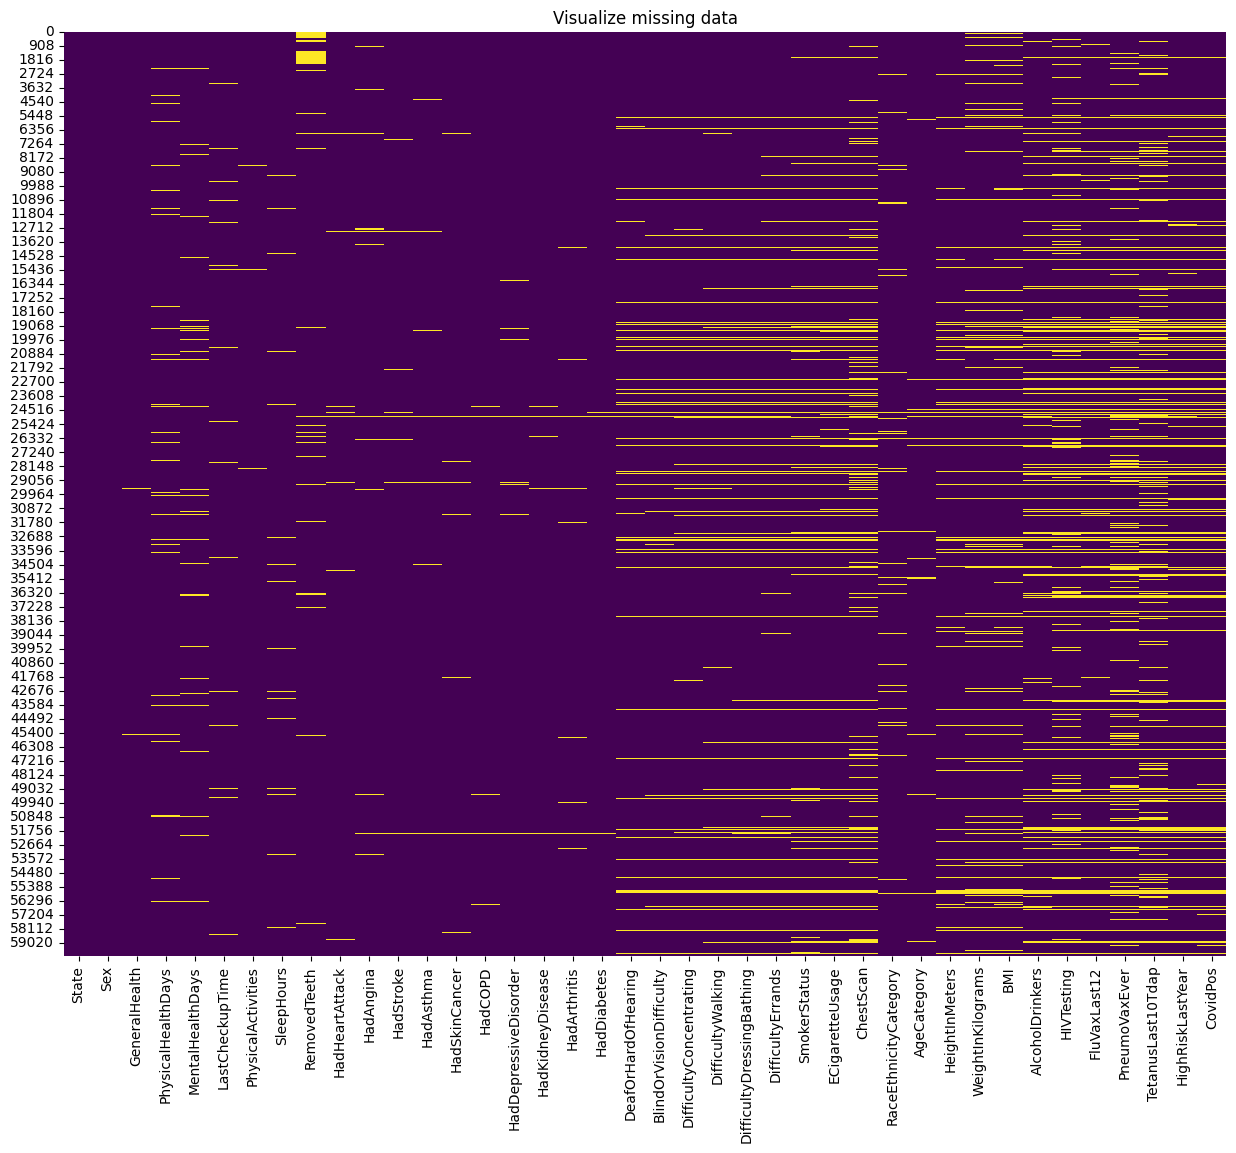

In [130]:
# Visualize missing data
plt.figure(figsize=(15,12))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Visualize missing data')
plt.show()

### Missing Value Cleaning

> Encoder

In [131]:
# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import LabelEncoder
# from sklearn.feature_selection import f_classif
# from scipy.stats import chi2_contingency


# # 自定義 Cramér's V 函數
# def cramers_v(x, y):
#     confusion_matrix = pd.crosstab(x, y)
#     if confusion_matrix.shape[0] < 2 or confusion_matrix.shape[1] < 2:
#         return 0.0
#     chi2, _, _, _ = chi2_contingency(confusion_matrix)
#     n = confusion_matrix.sum().sum()
#     r, k = confusion_matrix.shape
#     phi2 = chi2 / n
#     return np.sqrt(phi2 / min(k - 1, r - 1)) if min(k - 1, r - 1) > 0 else 0.0

# # === Step 1: 載入資料與欄位分類 ===
# df = pd.read_csv("../data/raw/heart_2022_with_nans.csv")
# target = "HadHeartAttack"

# df["HadHeartAttack_str"] = df[target].astype(str)

# cat_cols = df.select_dtypes(include=["object", "category"]).columns.drop(target, errors="ignore").tolist()
# num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

# # === Step 2: Label Encoding（不處理 NaN）===
# le = LabelEncoder()
# notna_mask = df[target].notna()
# df.loc[notna_mask, target] = le.fit_transform(df.loc[notna_mask, target])

# for col in cat_cols:
#     df[f"{col}_str"] = df[col].astype(str)
# for col in cat_cols:
#     valid_mask = df[col].notna()
#     df.loc[valid_mask, col] = le.fit_transform(df.loc[valid_mask, col])

# # === Step 3-1: 類別型欄位計算 Cramér's V ===
# cat_corr = {}
# for col in cat_cols:
#     valid = df[[col, target]].dropna()
#     if not valid.empty:
#         cat_corr[col] = cramers_v(valid[col], valid[target])

# # === Step 3-2: 數值型欄位計算 F-score 並轉換為相關係數 ===
# num_corr = {}
# for col in num_cols:
#     valid = df[[col, target]].dropna()
#     # print(valid[target].unique())

#     if valid[target].nunique() >= 2:
#         X = valid[[col]].astype(float)
#         y = valid[target].astype(int)
#         f_val, _ = f_classif(X, y)
#         r = np.sqrt(f_val[0] / (f_val[0] + len(X) - 2)) if f_val[0] > 0 else 0
#         num_corr[col] = r

# # === Step 4: 分開排序並印出 ===
# sorted_cat = sorted(cat_corr.items(), key=lambda x: x[1], reverse=True)
# sorted_num = sorted(num_corr.items(), key=lambda x: x[1], reverse=True)


# print("\n📊 數值型特徵與目標變數的相關係數（由 F-score 推估）:")
# for col, score in sorted_num:
#     print(f"{col}: {score:.4f}")
# print("📊 類別型特徵與目標變數的相關係數（Cramér’s V）:")
# for col, score in sorted_cat:
#     print(f"{col}: {score:.4f}")



> group-based imputation

In [132]:
# set the group
group_cols = ['GeneralHealth', 'HadAngina', 'HadStroke', "AgeCategory"]

for col in group_cols:
    if df[col].dtype == 'object' or str(df[col].dtype) == 'category':
        df[col] = df[col].fillna(df[col].mode().iloc[0])
    else:
        df[col] = df[col].fillna(df[col].median())

df_result = df.copy()

for col in df.columns:
    if col in group_cols or df[col].isnull().sum() == 0:
        continue

    if df[col].dtype == 'object' or str(df[col].dtype) == 'category':
        df_result[col] = df_result.groupby(group_cols)[col].transform(
            lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x)
        if df_result[col].isnull().sum() > 0:
            fallback = df_result[col].mode()
            if not fallback.empty:
                df_result[col] = df_result[col].fillna(fallback.iloc[0])
    else:
        df_result[col] = df_result.groupby(group_cols)[col].transform(
            lambda x: x.fillna(x.median()))
        if df_result[col].isnull().sum() > 0:
            df_result[col] = df_result[col].fillna(df_result[col].median())

df = pd.DataFrame(df_result)
df.to_csv("../data/cleaned/heart_2022_cleaned.csv", index=False)


In [133]:
new_path = '../data/cleaned/heart_2022_cleaned.csv'
df = pd.read_csv(new_path ,sep=',',encoding='utf-8')

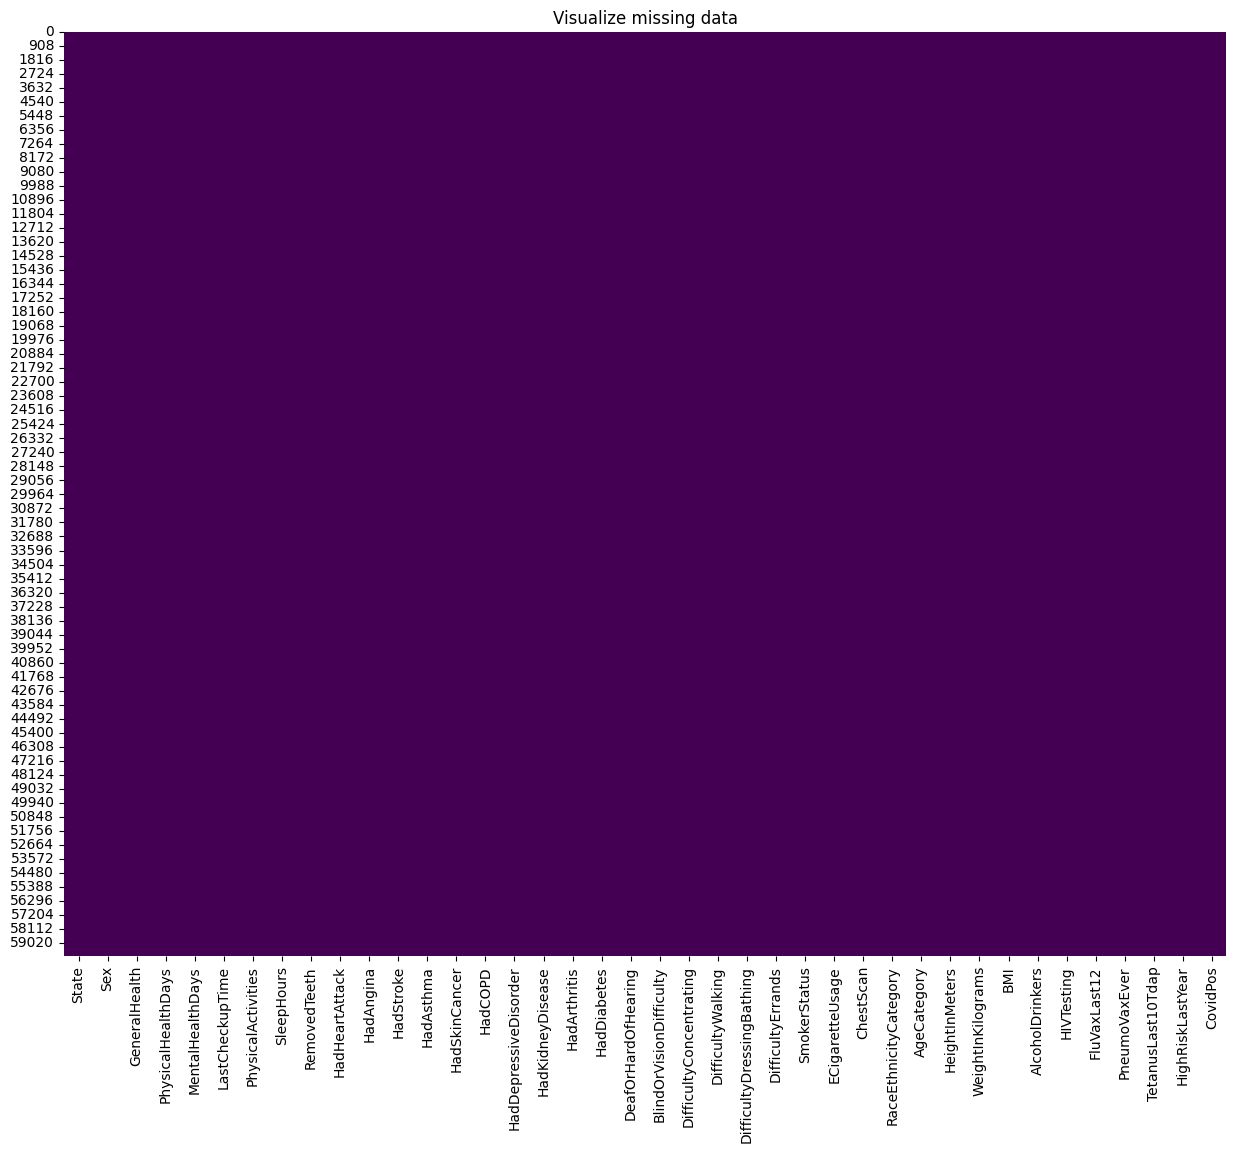

0


In [118]:
# Visualize missing data
plt.figure(figsize=(15,12))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Visualize missing data')
plt.show()
print(df["BMI"].isnull().sum())



### Features Distribution

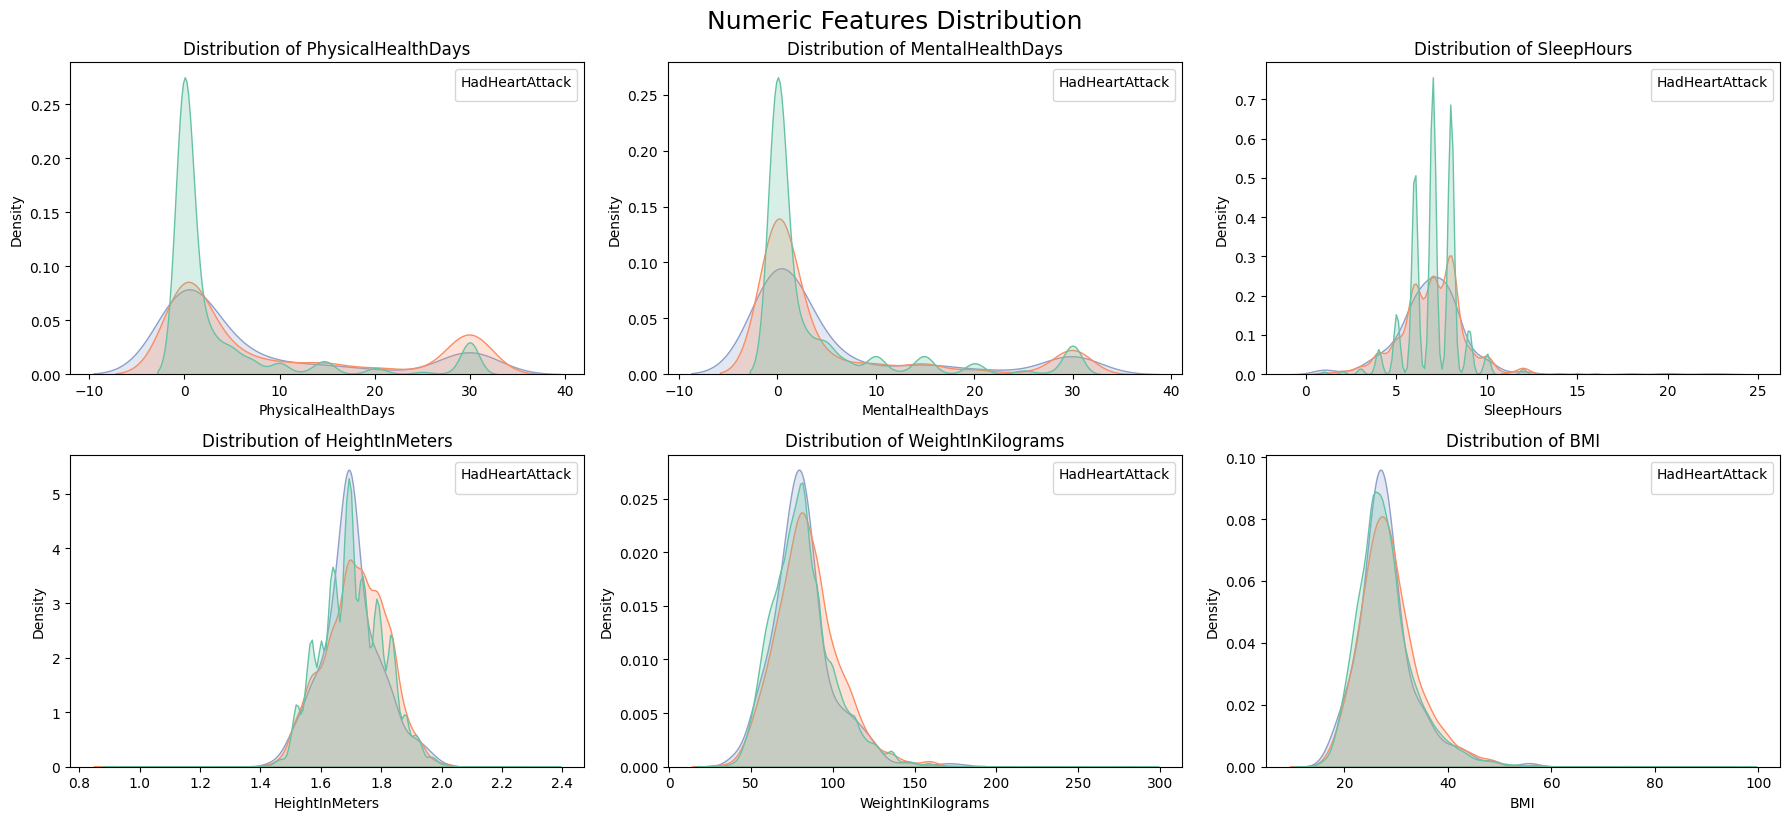

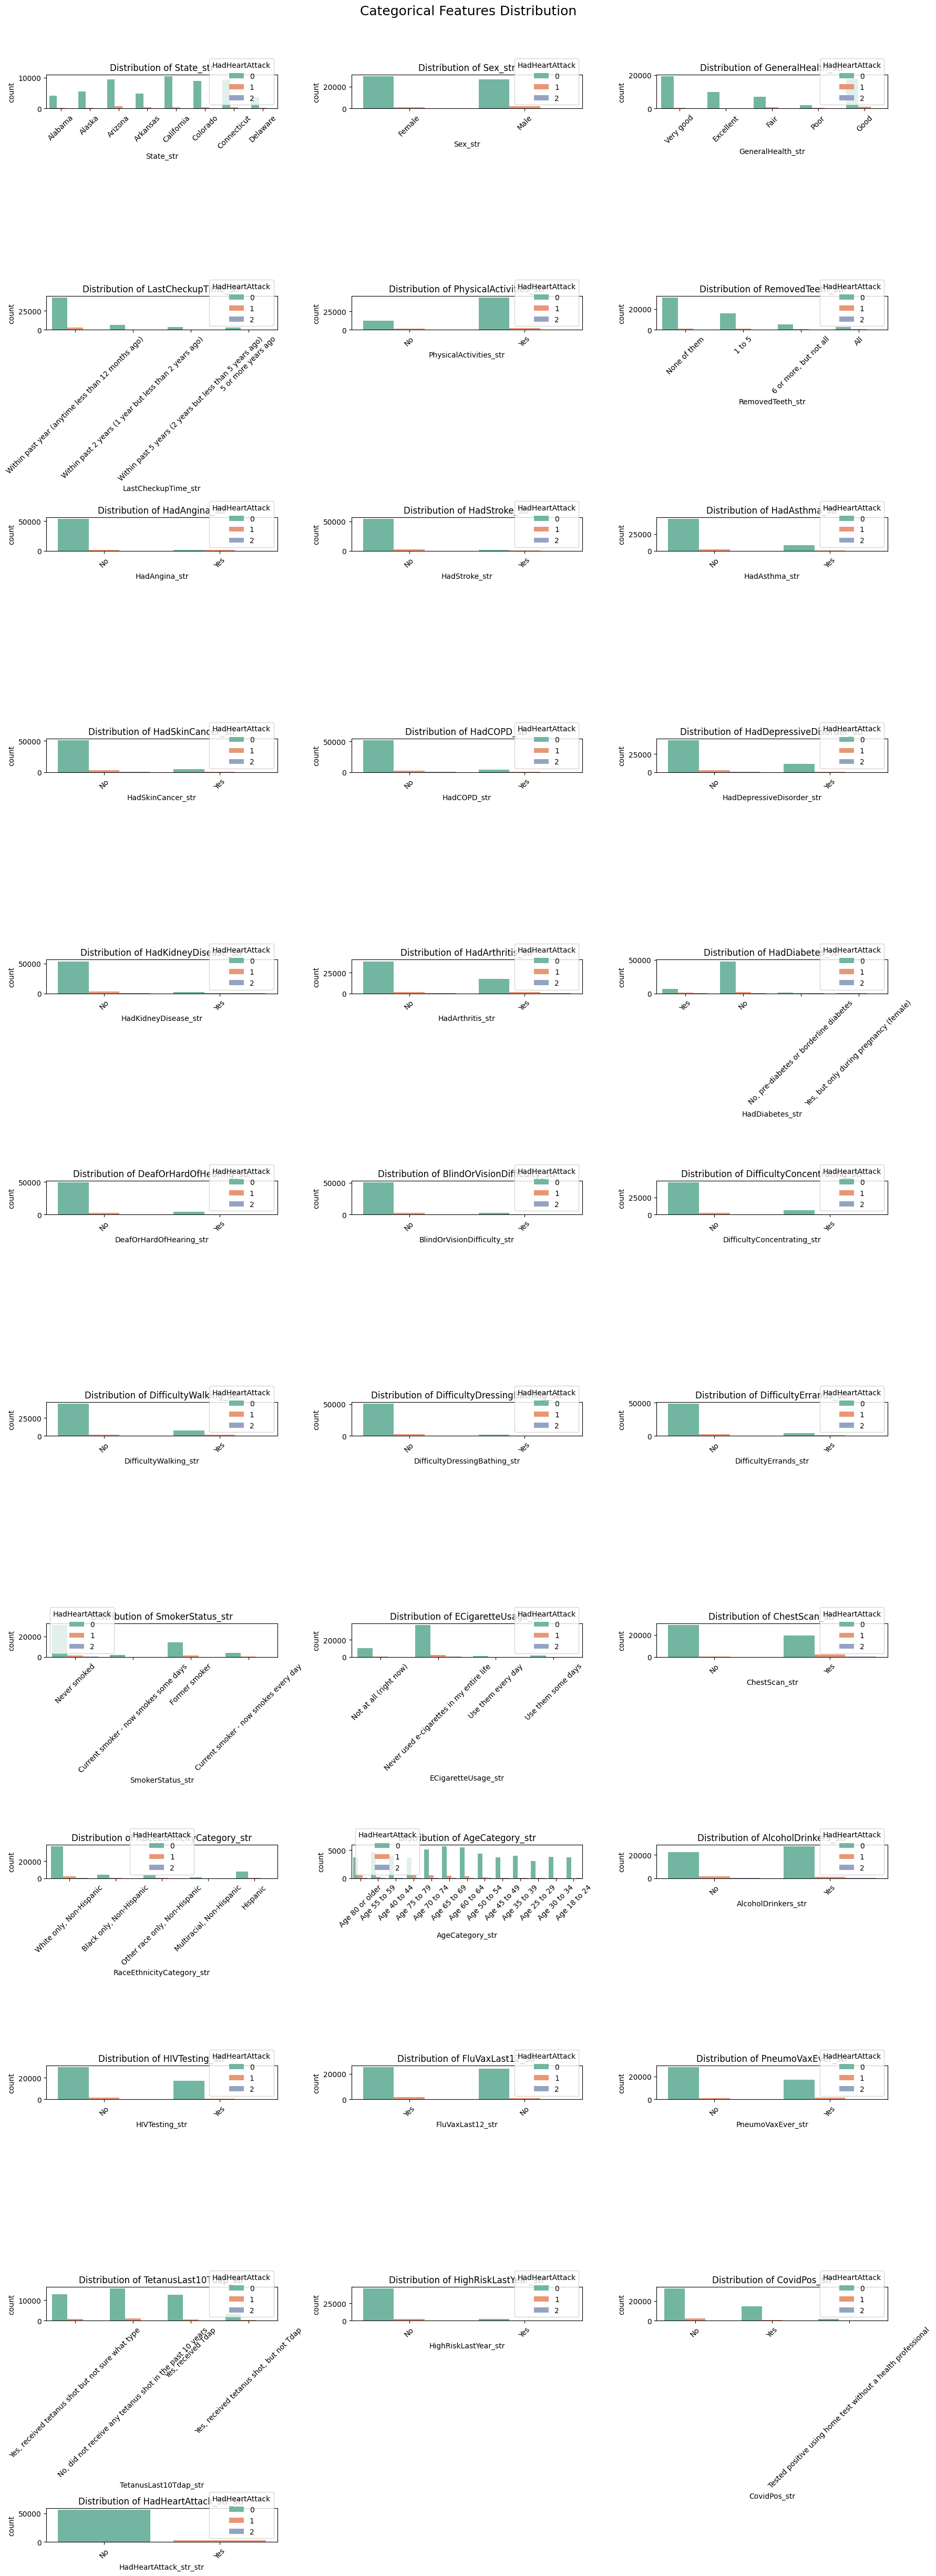

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # === 數值型欄位的 KDE 分布圖 ===
# n_cols = 3
# n_rows = (len(num_cols) + n_cols - 1) // n_cols

# fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 4 * n_rows))
# axes = axes.flatten()

# for idx, col in enumerate(num_cols):
#     sns.kdeplot(data=df, x=col, hue='HadHeartAttack_str', fill=True, common_norm=False, palette='Set2', ax=axes[idx])
#     axes[idx].set_title(f'Distribution of {col}')
#     axes[idx].legend(title='HadHeartAttack')

# # 移除多餘子圖格
# for i in range(len(num_cols), len(axes)):
#     fig.delaxes(axes[i])

# plt.tight_layout()
# plt.suptitle('Numeric Features Distribution', fontsize=18, y=1.02)
# plt.show()


# # === 類別型欄位的長條圖 ===
# cat_str_cols = [f"{col}_str" for col in cat_cols]
# n_cols = 3
# n_rows = (len(cat_str_cols) + n_cols - 1) // n_cols

# fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 4 * n_rows))
# axes = axes.flatten()

# for idx, col in enumerate(cat_str_cols):
#     sns.countplot(data=df, x=col, hue='HadHeartAttack_str', palette='Set2', ax=axes[idx])
#     axes[idx].set_title(f'Distribution of {col}')
#     axes[idx].tick_params(axis='x', rotation=45)
#     axes[idx].legend(title='HadHeartAttack')

# # 移除多餘子圖格
# for i in range(len(cat_str_cols), len(axes)):
#     fig.delaxes(axes[i])

# plt.tight_layout()
# plt.suptitle('Categorical Features Distribution', fontsize=18, y=1.02)
# plt.show()


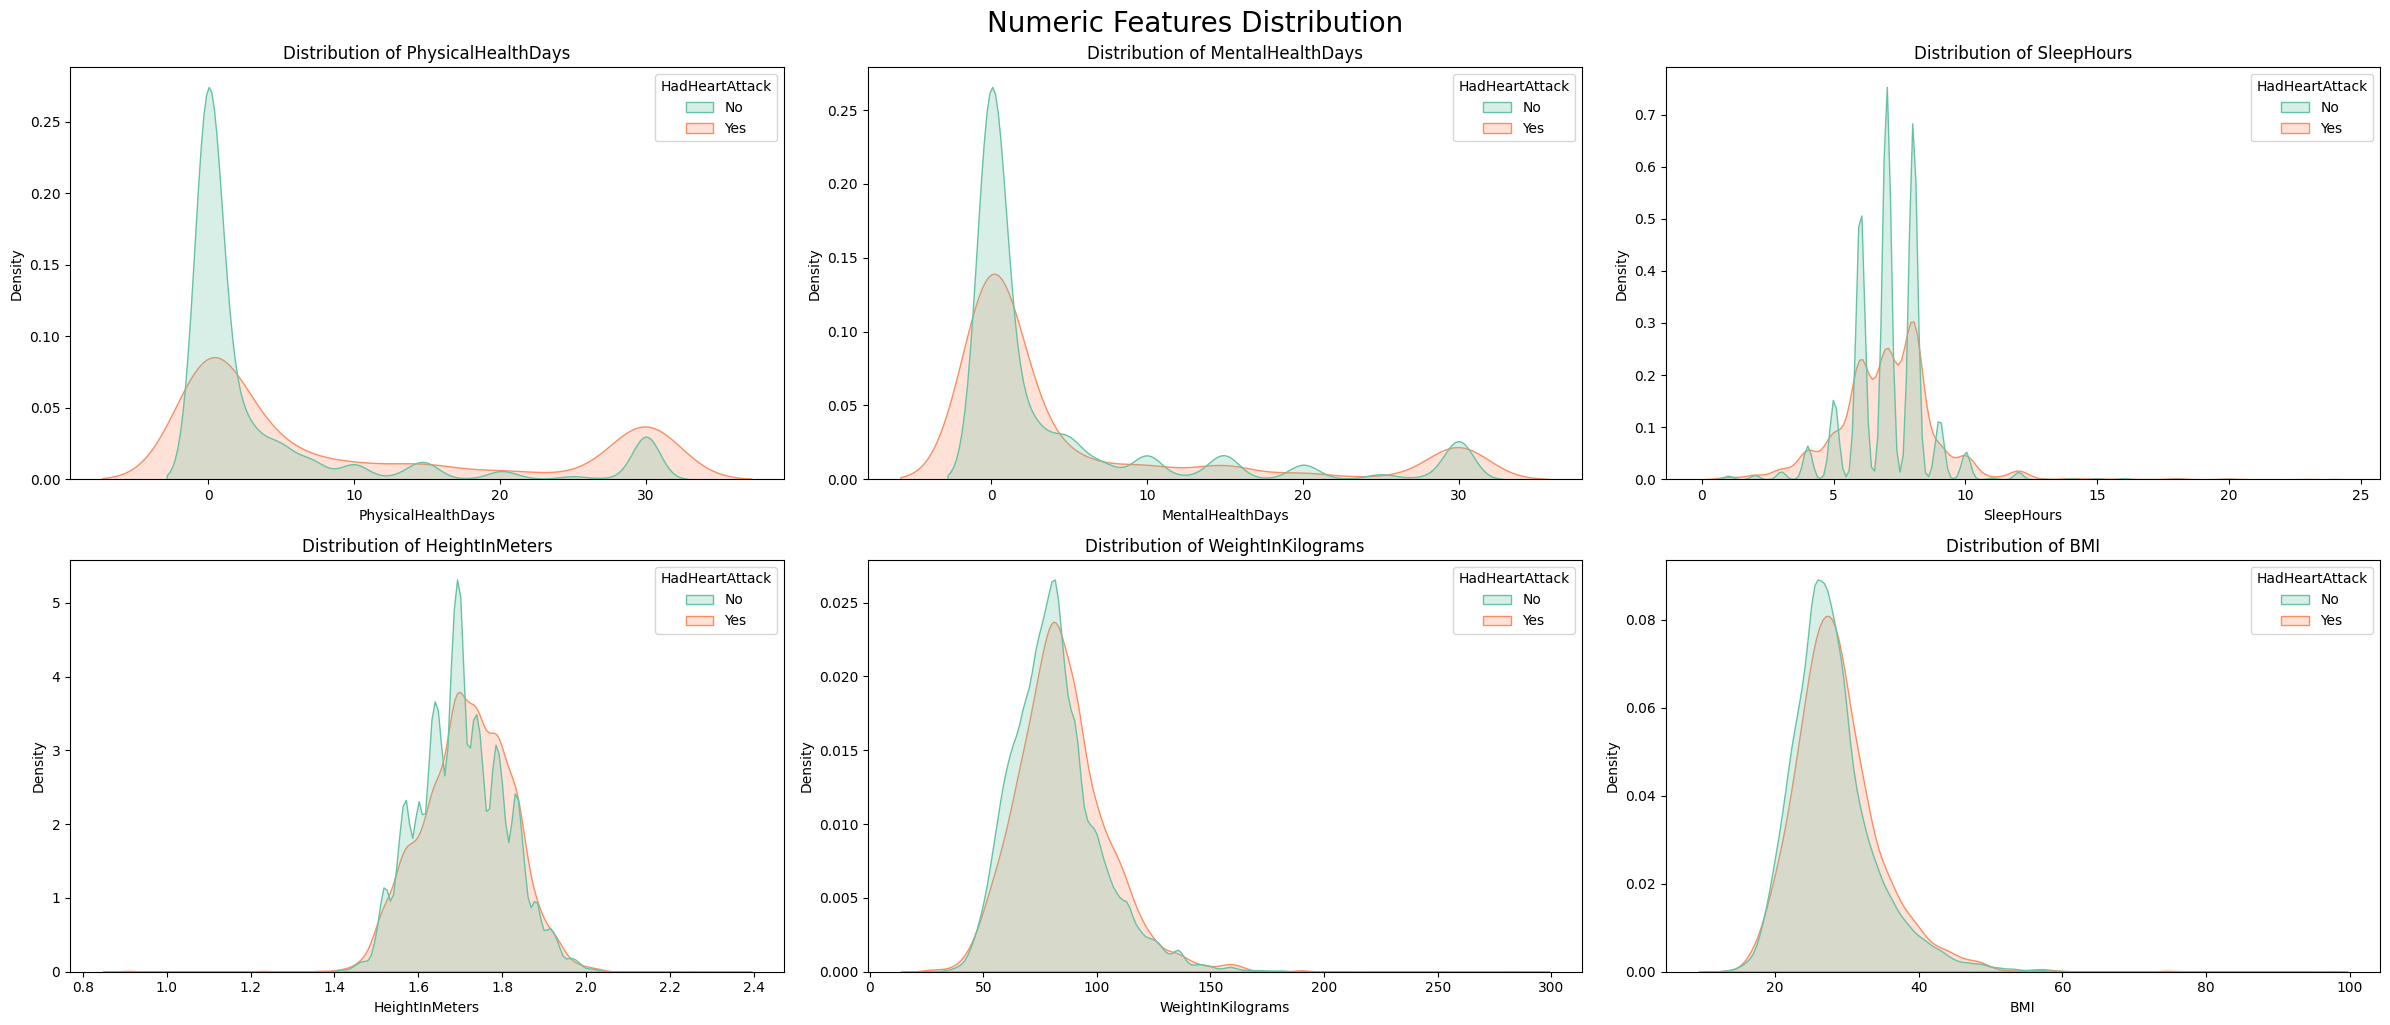

In [134]:
# Numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

n_cols = 3
n_rows = (len(numerical_features) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(8 * n_cols, 5 * n_rows))
axes = axes.flatten()
plt.title('Numeric Features Distribution', fontsize=20, y=1.02)
for idx, col in enumerate(numerical_features):
    sns.kdeplot(data=df, x=col, hue='HadHeartAttack', fill=True, common_norm=False, palette='Set2', ax=axes[idx])
    axes[idx].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.suptitle('Numeric Features Distribution', fontsize=20, y=1.02)
plt.show()


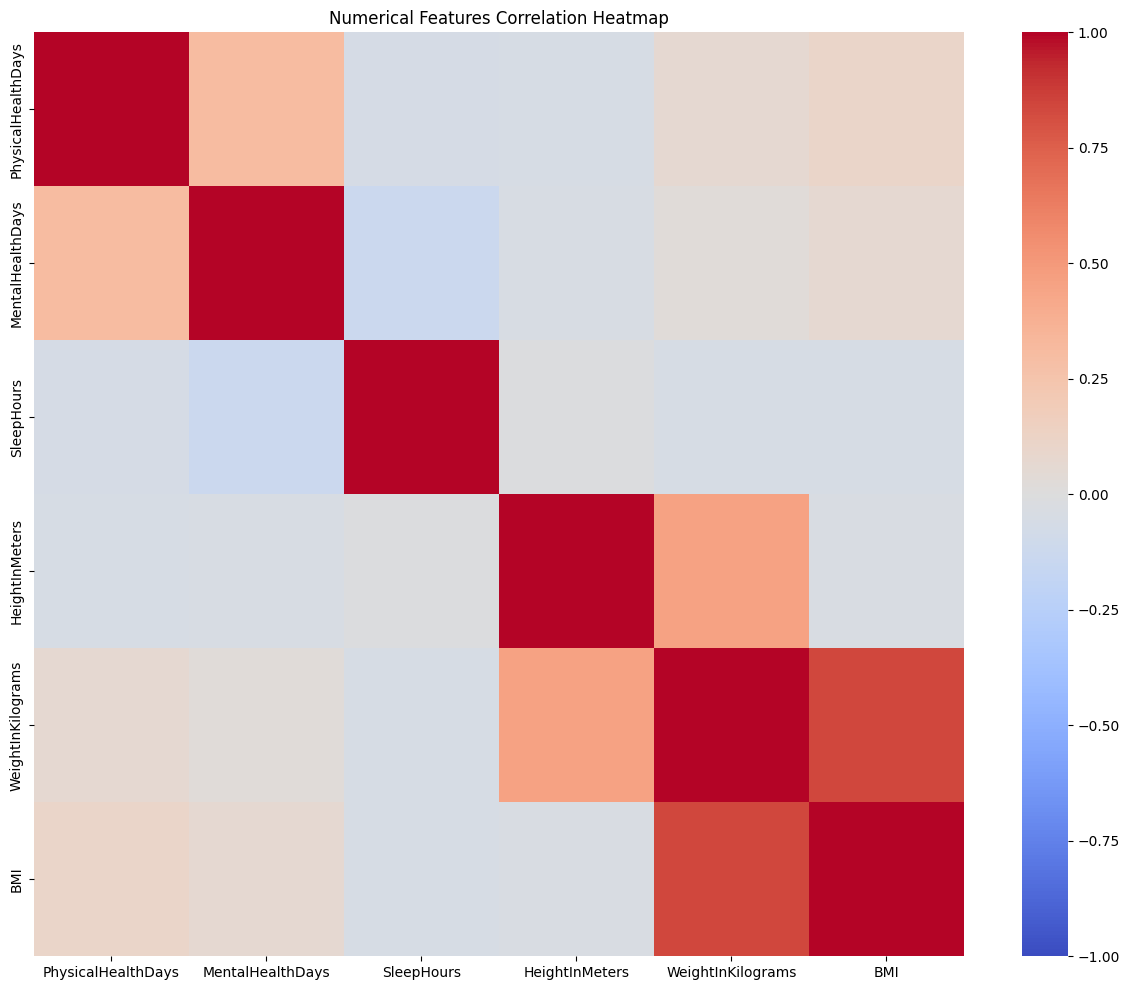

In [135]:
# Numerical Features Correlation
plt.figure(figsize=(15,12))
corr = df.select_dtypes(include = 'number').corr()
sns.heatmap(corr, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Numerical Features Correlation Heatmap')
plt.show()

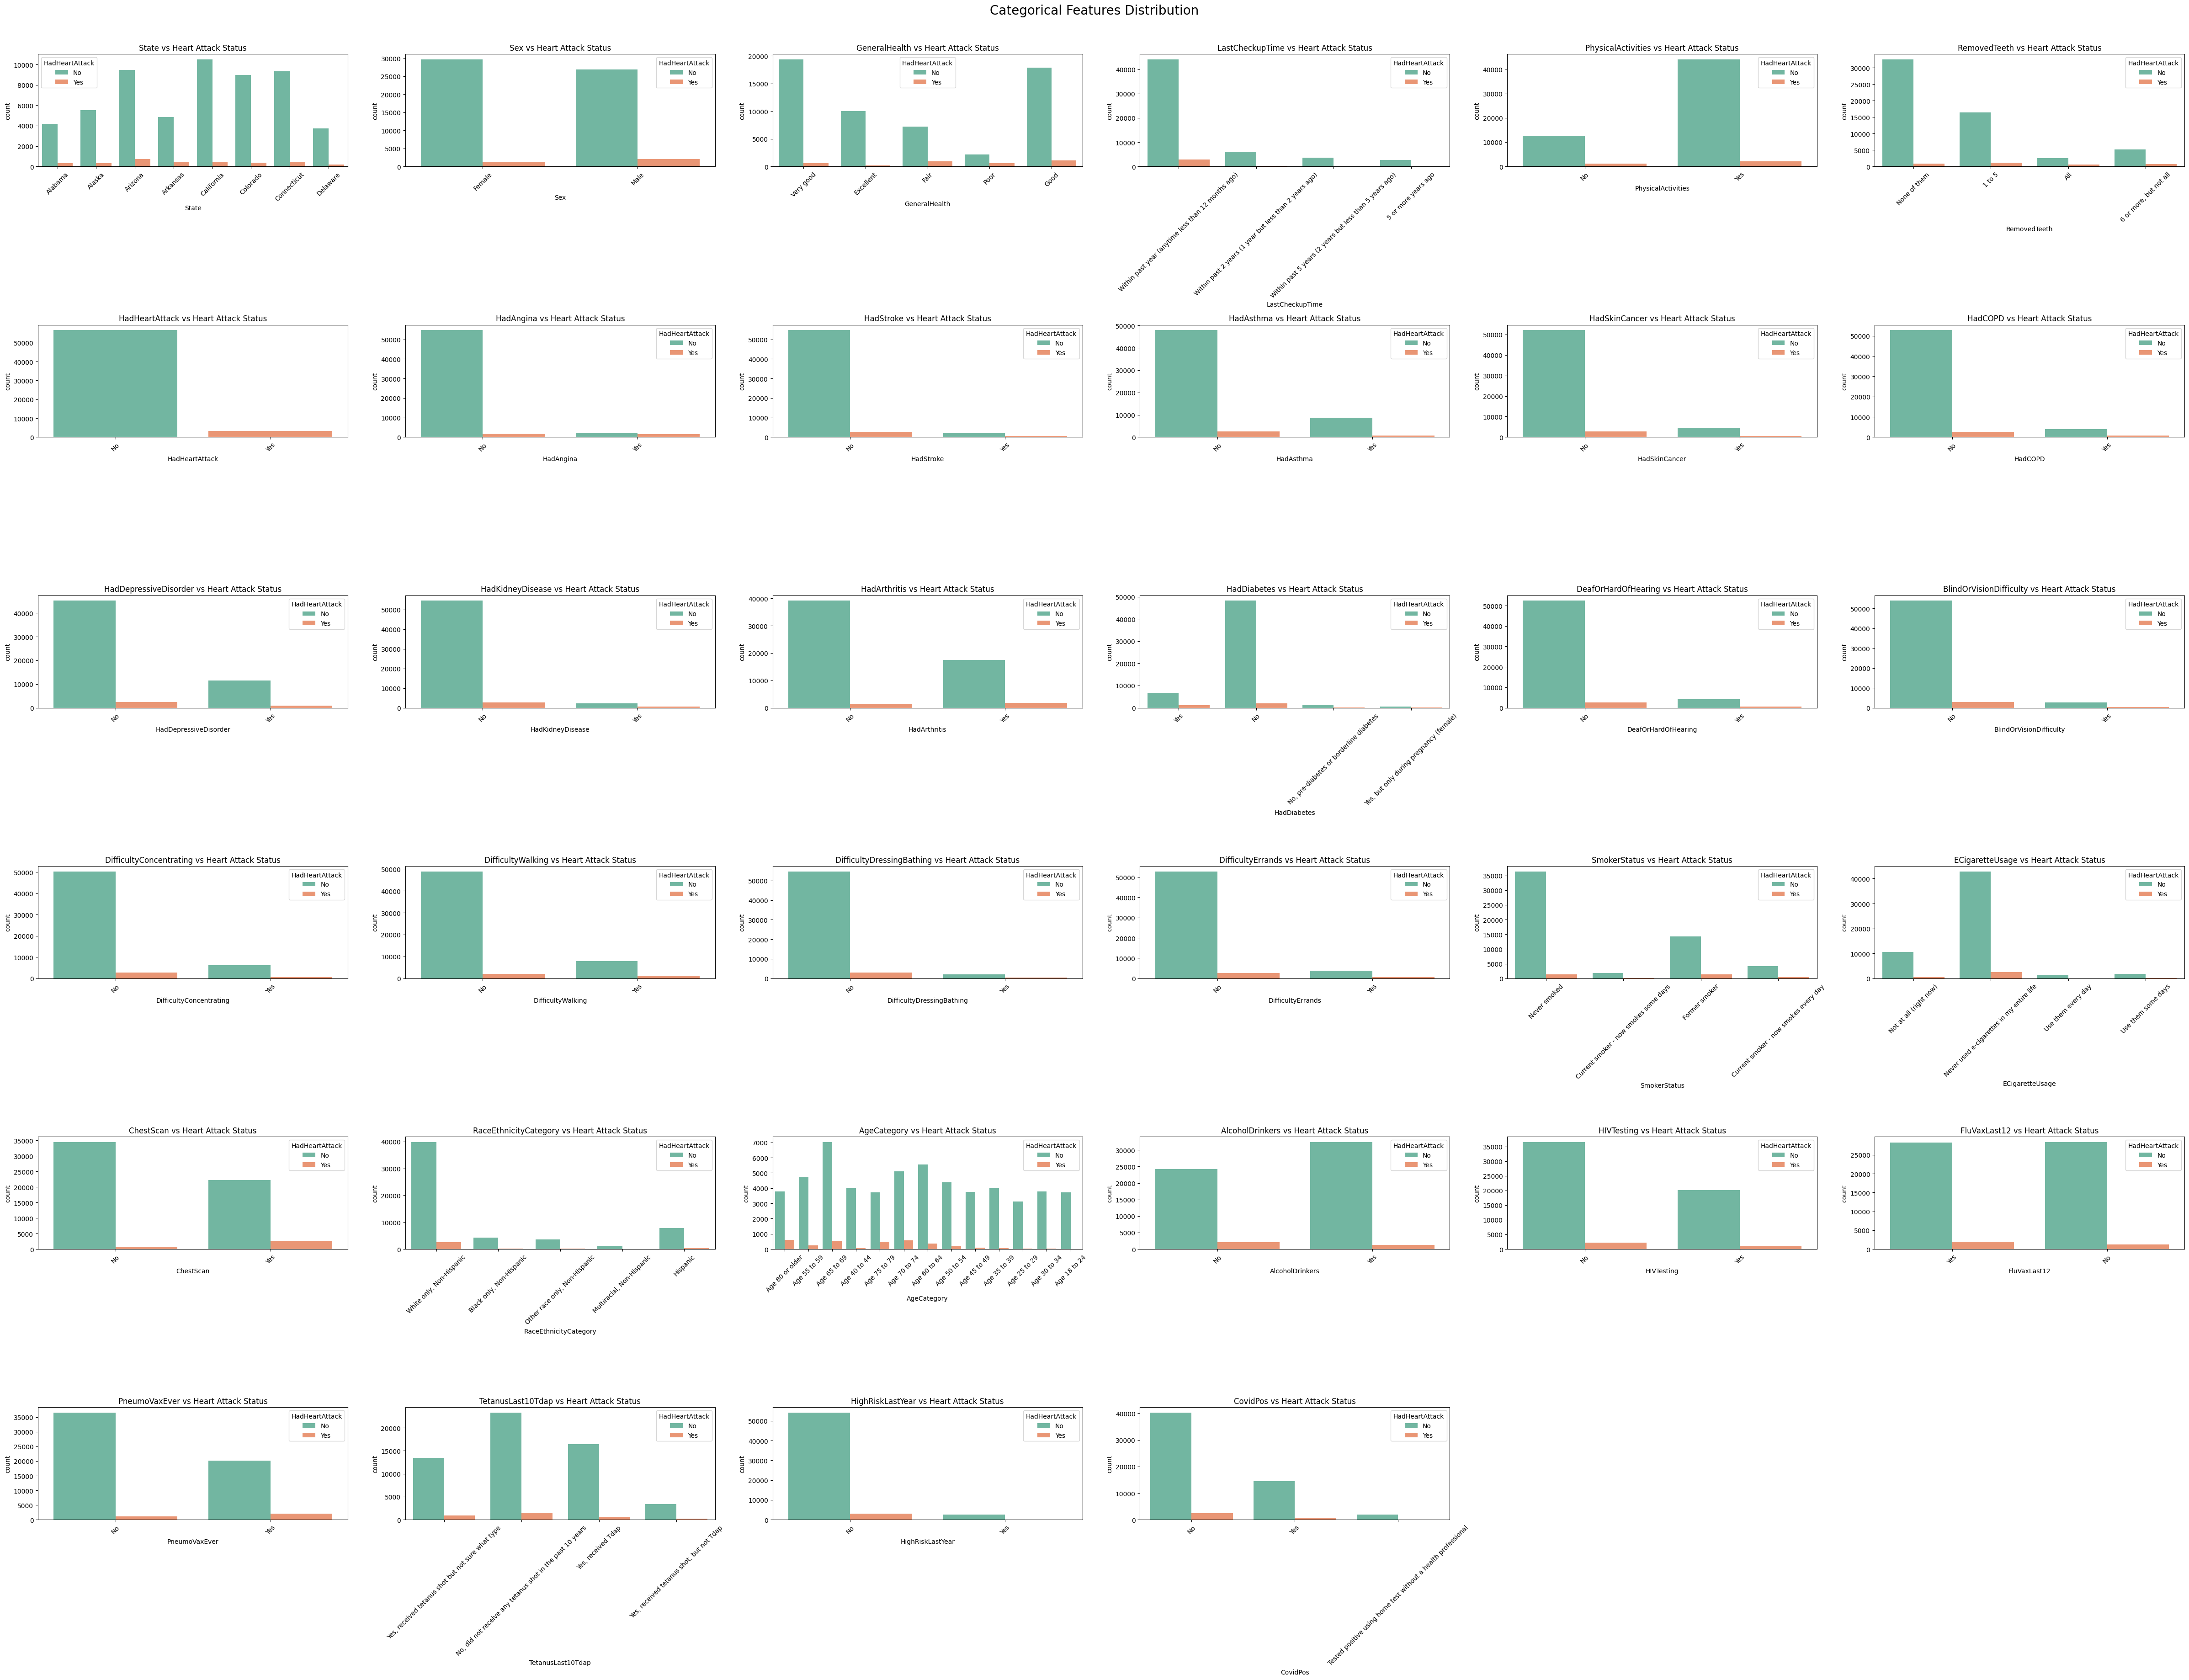

In [136]:
# Categorical features
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

n_cols = 6
n_rows = (len(categorical_features) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(8 * n_cols, 6 * n_rows))
axes = axes.flatten()

for idx, col in enumerate(categorical_features):
    sns.countplot(data=df, x=col, hue='HadHeartAttack', palette='Set2', ax=axes[idx])
    axes[idx].set_title(f'{col} vs Heart Attack Status')
    axes[idx].tick_params(axis='x', rotation=45)


for i in range(len(categorical_features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.suptitle('Categorical Features Distribution', fontsize=20, y=1.02)
plt.show()


In [137]:
df.describe(include='object').T

,count,unique,top,freq
State,59903,8,California,10952
Sex,59903,2,Female,30929
GeneralHealth,59903,5,Very good,19970
LastCheckupTime,59903,4,Within past year (anytime less than 12 months ...,47043
PhysicalActivities,59903,2,Yes,46034
RemovedTeeth,59903,4,None of them,33485
HadHeartAttack,59903,2,No,56639
HadAngina,59903,2,No,56521
HadStroke,59903,2,No,57359
HadAsthma,59903,2,No,50553


### Binning
> Binning some numerical features for better insights

In [138]:
# BMI Category
bins = [0, 18.5, 25, 30, 35, np.inf]
labels = ['Underweight', 'Normal weight',
          'Overweight', 'Obese', 'Extremly Obese']
df['BMI_Category'] = pd.cut(df['BMI'], bins, labels=labels)

df["BMI_Category"].value_counts()


BMI_Category
Overweight        25213
Normal weight     16845
Obese             10250
Extremly Obese     6579
Underweight        1016
Name: count, dtype: int64

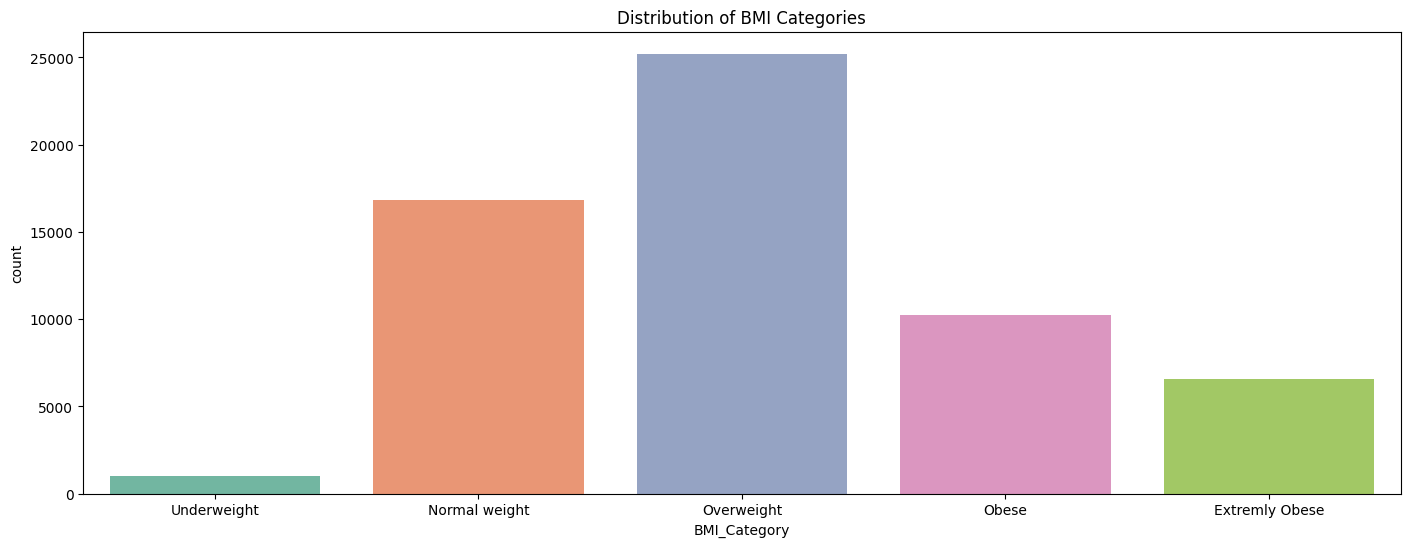

In [139]:
# Plotting BMI Category distribution
plt.figure(figsize=(17, 6))
sns.countplot(x='BMI_Category', data=df, palette='Set2')
plt.title('Distribution of BMI Categories')
plt.show()

In [140]:
# SleepHours Category
sleep_bins = [0, 4, 6, 8, 10, np.inf]
sleep_labels = ['Very Short Sleep', 'Short Sleep', 'Normal Sleep', 'Long Sleep', 'Very Long Sleep']

df['SleepHours_Category'] = pd.cut(df['SleepHours'], bins=sleep_bins, labels=sleep_labels)

df['SleepHours_Category'].value_counts()


SleepHours_Category
Normal Sleep        35435
Short Sleep         16994
Long Sleep           4319
Very Short Sleep     2476
Very Long Sleep       679
Name: count, dtype: int64

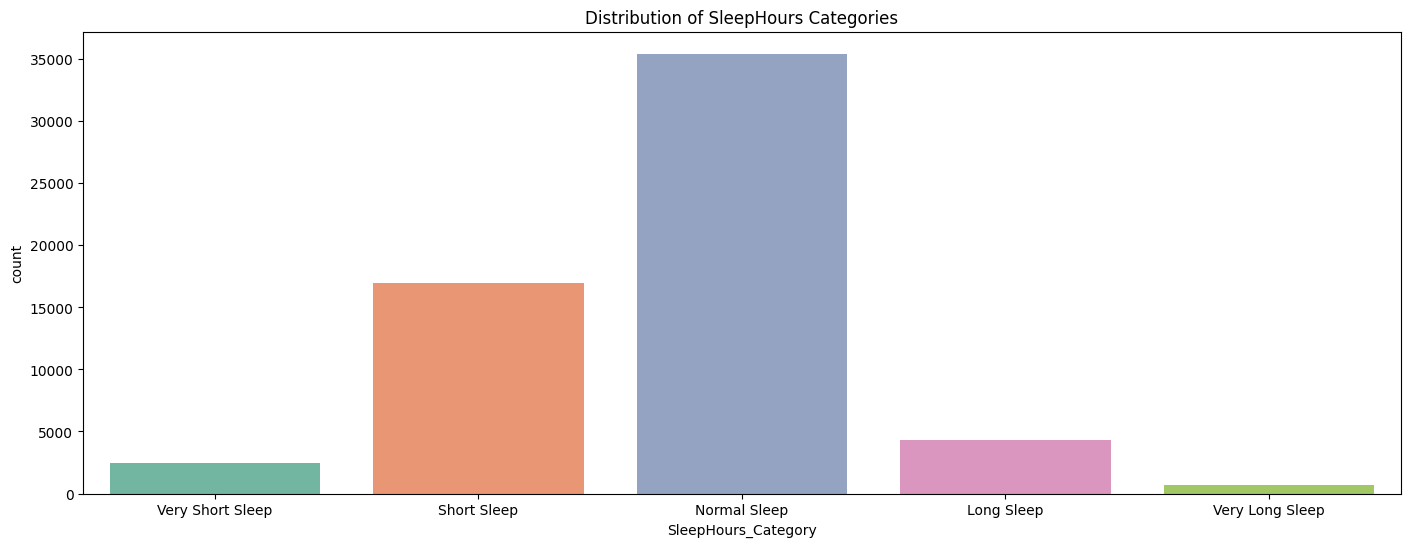

In [141]:
# Plotting SleepHours Category distribution
plt.figure(figsize=(17, 6))
sns.countplot(x='SleepHours_Category', data=df, palette='Set2')
plt.title('Distribution of SleepHours Categories')
plt.show()

> Adding more binning features ...

### EDA

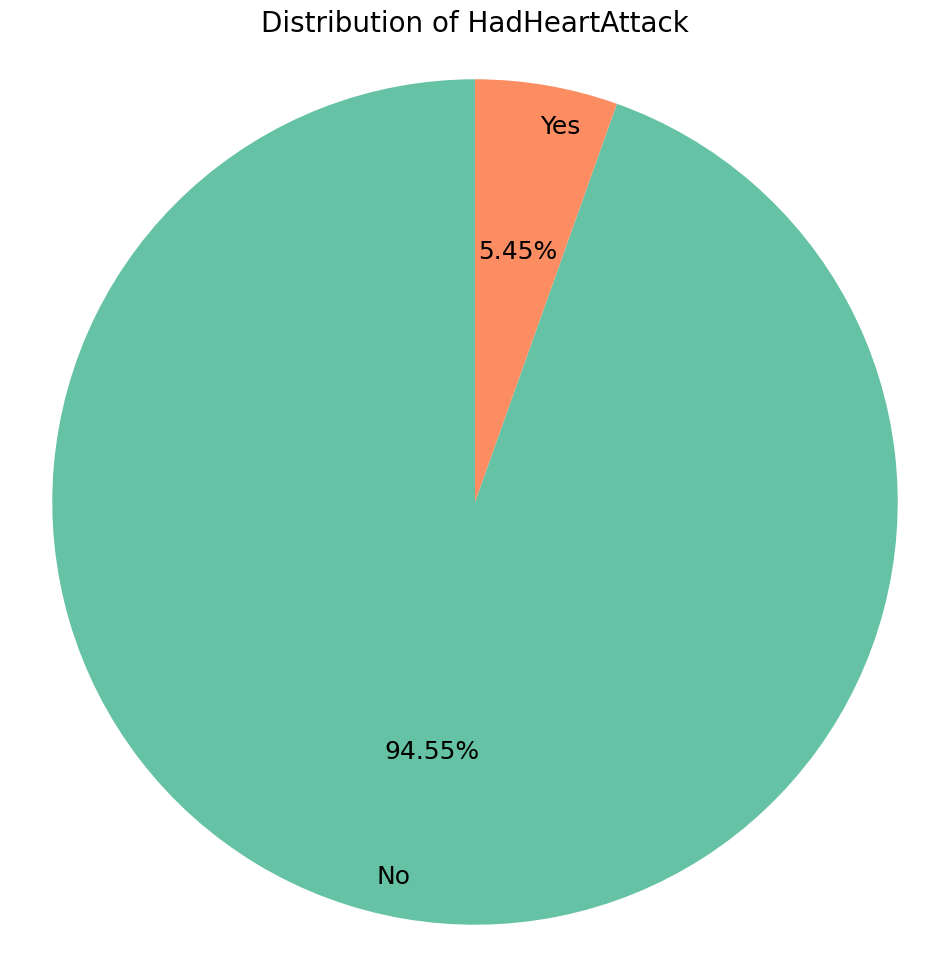

In [142]:
counts = df['HadHeartAttack'].value_counts()
palette_color = sns.color_palette('Set2')
plt.figure(figsize=(12,12))
plt.pie(counts, colors=palette_color, labels=counts.index,
        autopct='%1.2f%%', startangle=90, textprops={'fontsize': 18}, labeldistance=0.9)

plt.title('Distribution of HadHeartAttack', fontsize=20)
plt.axis('equal')
plt.show()


> Only there are 5.68% patients that have heart disease


#### Some 2 combined features may have better significance

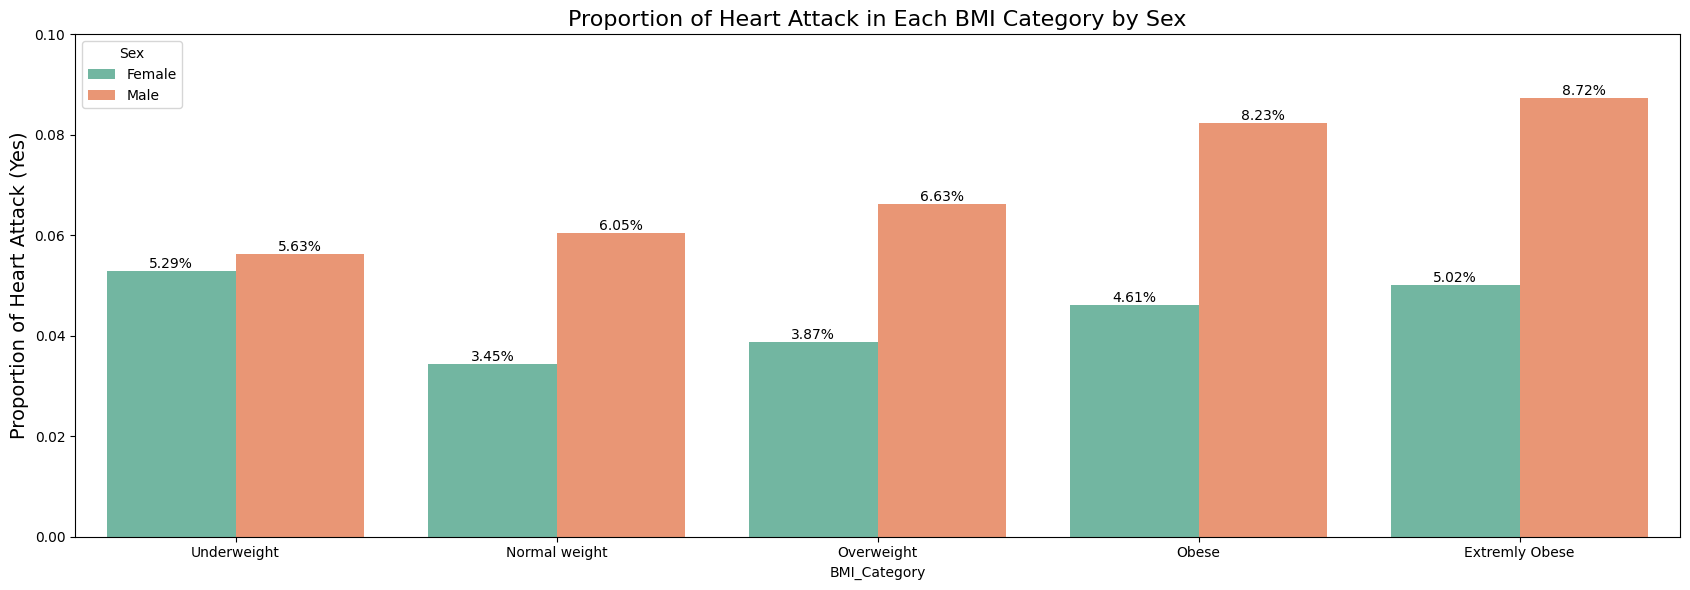

In [143]:
df['HeartAttackBinary'] = df['HadHeartAttack'].map({'Yes': 1, 'No': 0})

plt.figure(figsize=(17, 6))
ax = sns.barplot(
    data=df,
    x='BMI_Category',
    y='HeartAttackBinary',
    hue='Sex',
    estimator=np.mean, 
    palette='Set2',
    errorbar=None
)

plt.title('Proportion of Heart Attack in Each BMI Category by Sex', fontsize=16)
plt.ylabel('Proportion of Heart Attack (Yes)', fontsize=14)
plt.xticks()
plt.ylim(0, 0.1) 
plt.legend(title='Sex')


for container in ax.containers:
    ax.bar_label(container, labels=[f'{v.get_height()*100:.2f}%' for v in container], label_type='edge', fontsize=10)

plt.tight_layout()
plt.show()

##### The age of patients ?

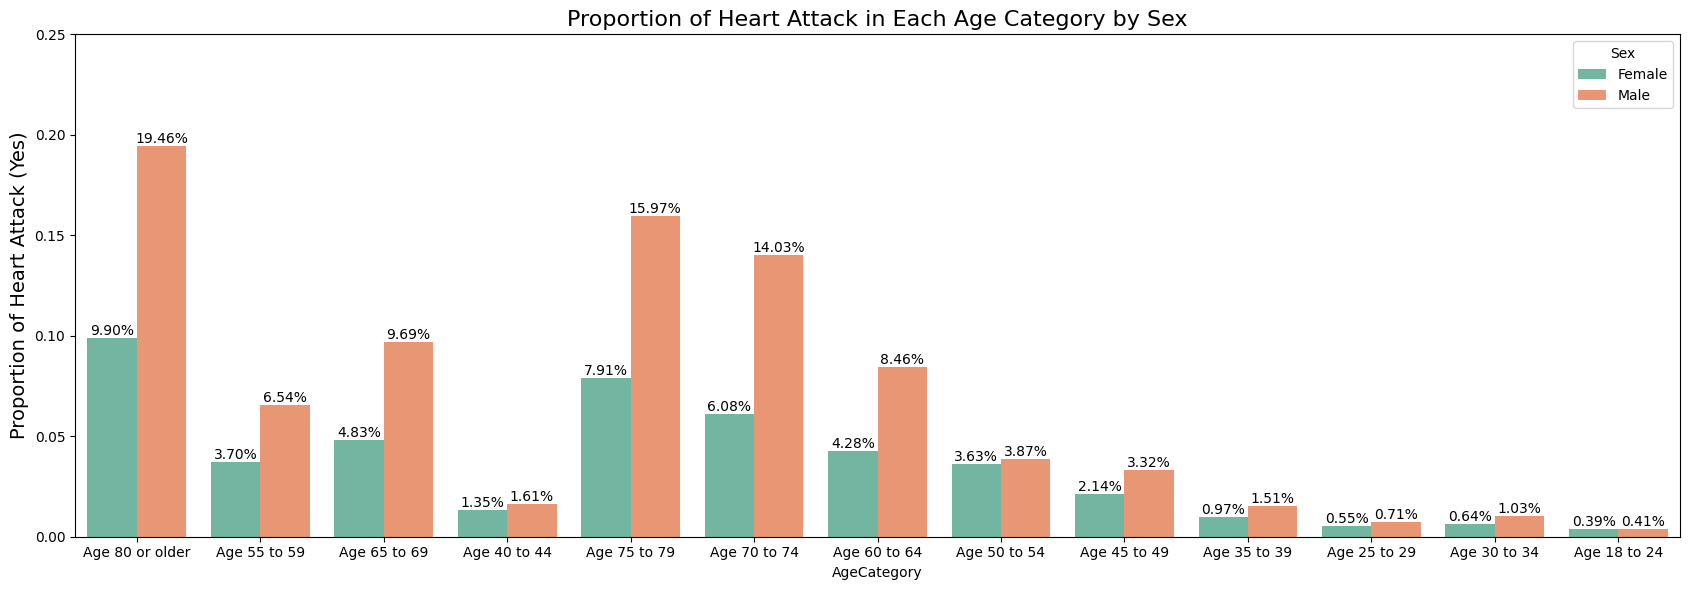

In [144]:
df['HeartAttackBinary'] = df['HadHeartAttack'].map({'Yes': 1, 'No': 0})

plt.figure(figsize=(17, 6))
ax = sns.barplot(
    data=df,
    x='AgeCategory',
    y='HeartAttackBinary',
    hue='Sex',
    estimator=np.mean, 
    palette='Set2',
    errorbar=None
)

plt.title('Proportion of Heart Attack in Each Age Category by Sex', fontsize=16)
plt.ylabel('Proportion of Heart Attack (Yes)', fontsize=14)
plt.xticks()
plt.ylim(0, 0.25) 
plt.legend(title='Sex')


for container in ax.containers:
    ax.bar_label(container, labels=[f'{v.get_height()*100:.2f}%' for v in container], label_type='edge', fontsize=10)

plt.tight_layout()
plt.show()

##### How many patients that have heart disease are smoking ?

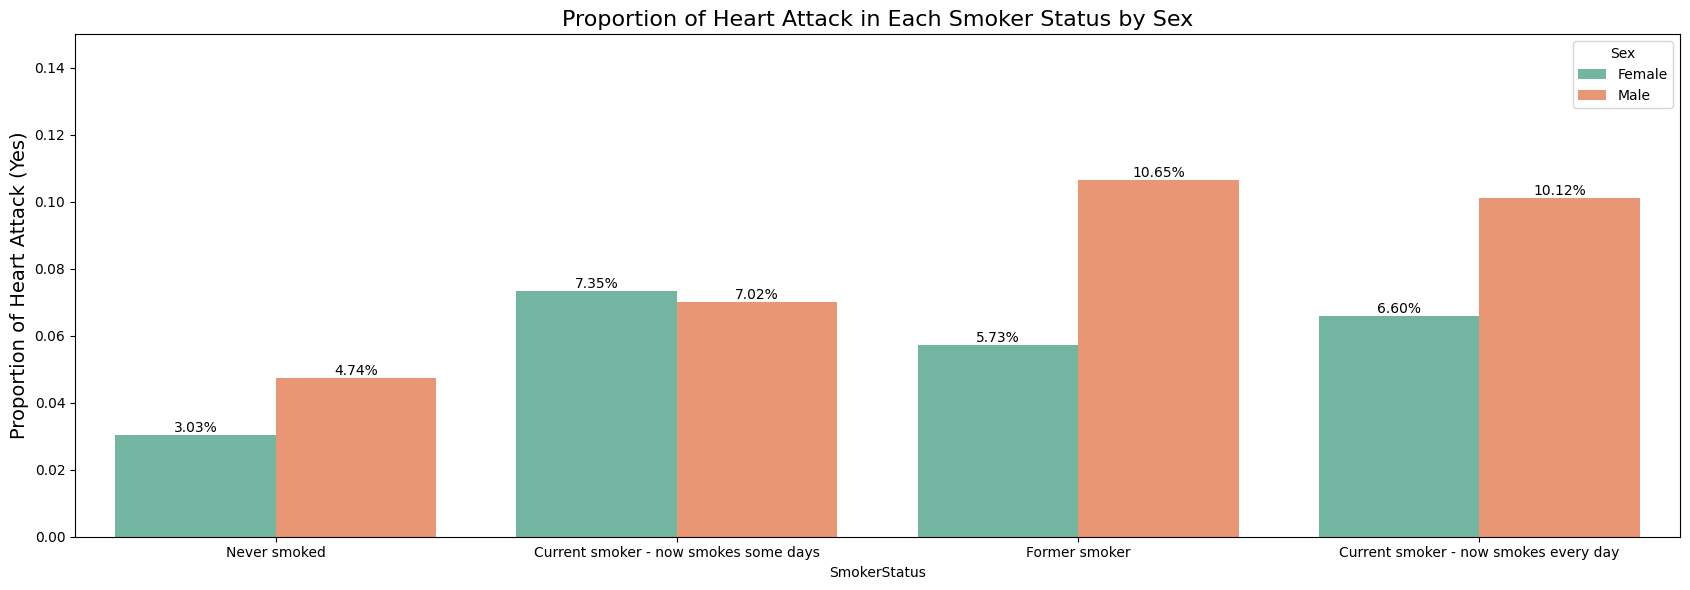

In [145]:
df['HeartAttackBinary'] = df['HadHeartAttack'].map({'Yes': 1, 'No': 0})

plt.figure(figsize=(17, 6))
ax = sns.barplot(
    data=df,
    x='SmokerStatus',
    y='HeartAttackBinary',
    hue='Sex',
    estimator=np.mean, 
    palette='Set2',
    errorbar=None
)

plt.title('Proportion of Heart Attack in Each Smoker Status by Sex', fontsize=16)
plt.ylabel('Proportion of Heart Attack (Yes)', fontsize=14)
plt.xticks()
plt.ylim(0, 0.15) 
plt.legend(title='Sex')


for container in ax.containers:
    ax.bar_label(container, labels=[f'{v.get_height()*100:.2f}%' for v in container], label_type='edge', fontsize=10)

plt.tight_layout()
plt.show()

##### Sleep vs Heart Disease

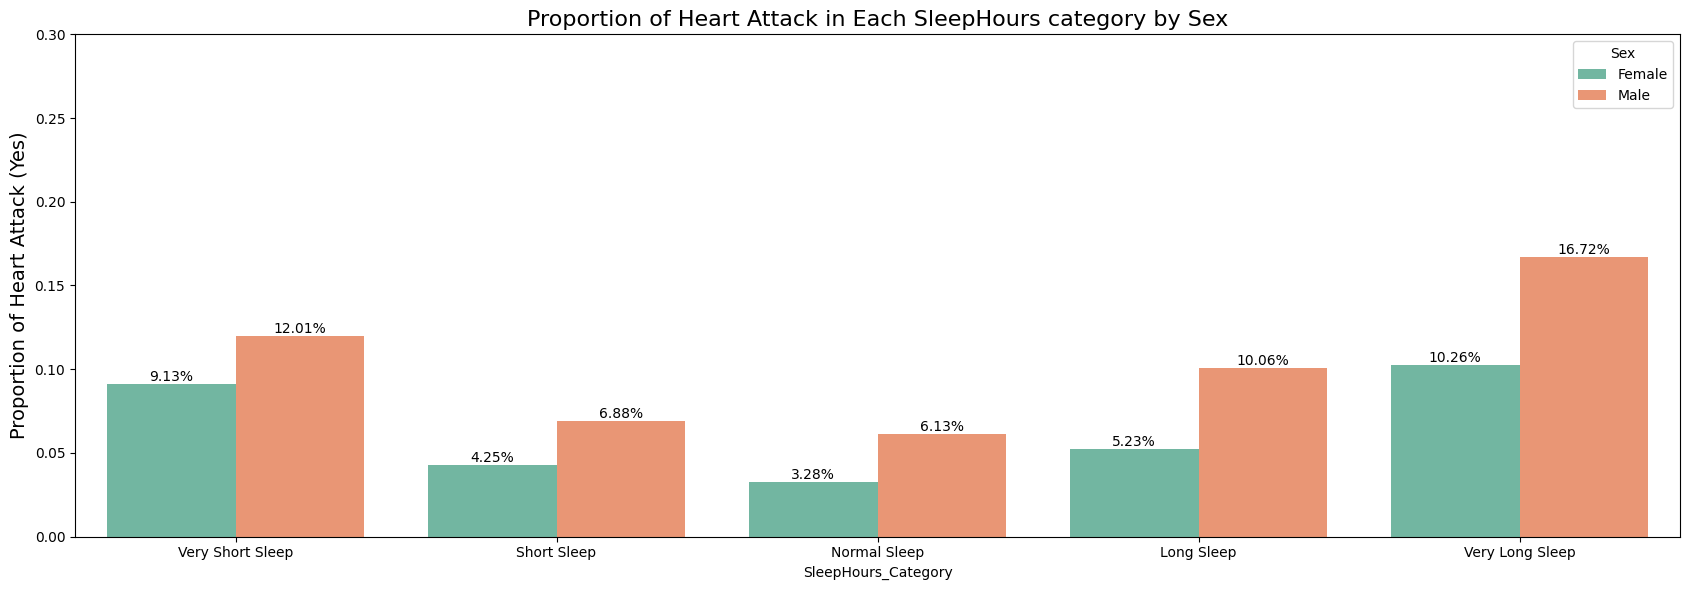

In [146]:
df['HeartAttackBinary'] = df['HadHeartAttack'].map({'Yes': 1, 'No': 0})

plt.figure(figsize=(17, 6))
ax = sns.barplot(
    data=df,
    x='SleepHours_Category',
    y='HeartAttackBinary',
    hue='Sex',
    estimator=np.mean, 
    palette='Set2',
    errorbar=None
)

plt.title('Proportion of Heart Attack in Each SleepHours category by Sex', fontsize=16)
plt.ylabel('Proportion of Heart Attack (Yes)', fontsize=14)
plt.xticks()
plt.ylim(0, 0.3) 
plt.legend(title='Sex')


for container in ax.containers:
    ax.bar_label(container, labels=[f'{v.get_height()*100:.2f}%' for v in container], label_type='edge', fontsize=10)

plt.tight_layout()
plt.show()

##### Checkup time with Astham

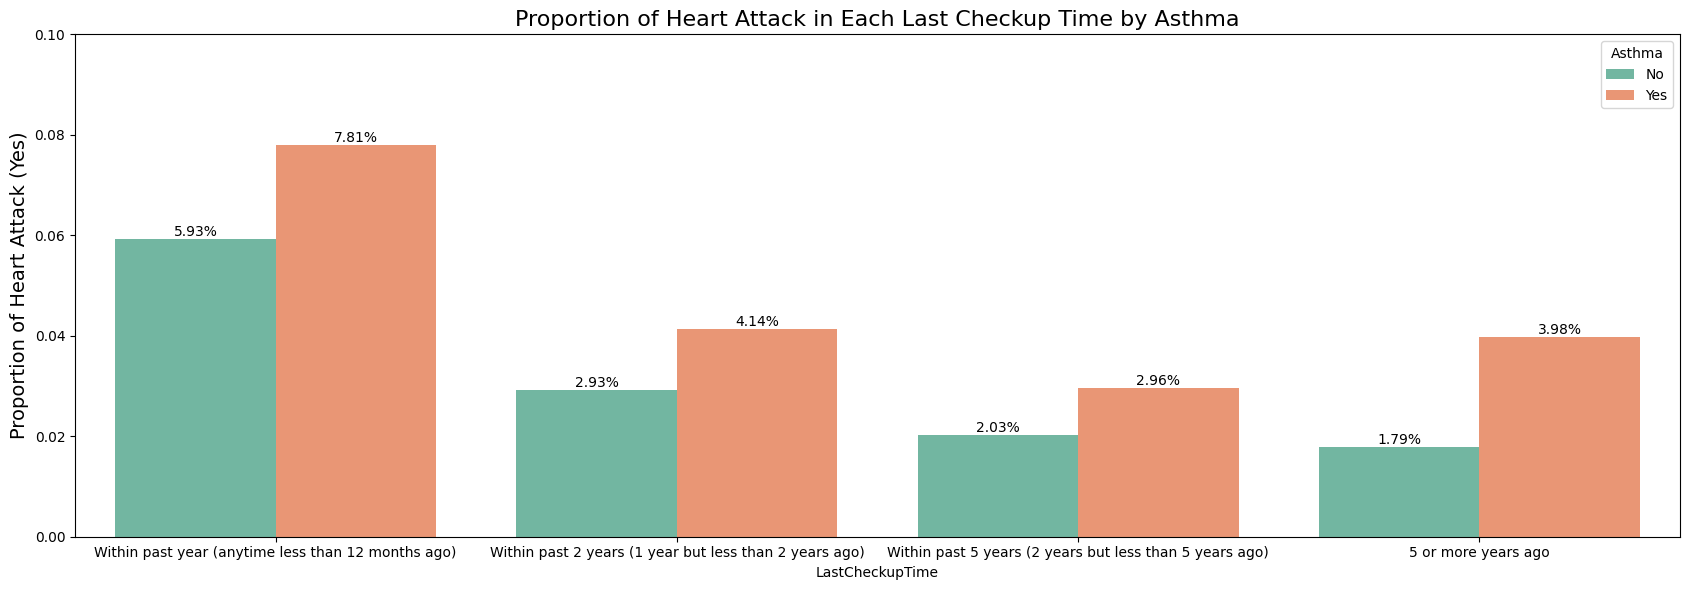

In [147]:
df['HeartAttackBinary'] = df['HadHeartAttack'].map({'Yes': 1, 'No': 0})

plt.figure(figsize=(17, 6))
ax = sns.barplot(
    data=df,
    x='LastCheckupTime',
    y='HeartAttackBinary',
    hue='HadAsthma',
    estimator=np.mean, 
    palette='Set2',
    errorbar=None
)

plt.title('Proportion of Heart Attack in Each Last Checkup Time by Asthma', fontsize=16)
plt.ylabel('Proportion of Heart Attack (Yes)', fontsize=14)
plt.xticks()
plt.ylim(0, 0.1) 
plt.legend(title='Asthma')


for container in ax.containers:
    ax.bar_label(container, labels=[f'{v.get_height()*100:.2f}%' for v in container], label_type='edge', fontsize=10)

plt.tight_layout()
plt.show()

##### ECigarette and Dinking habits with heart disease

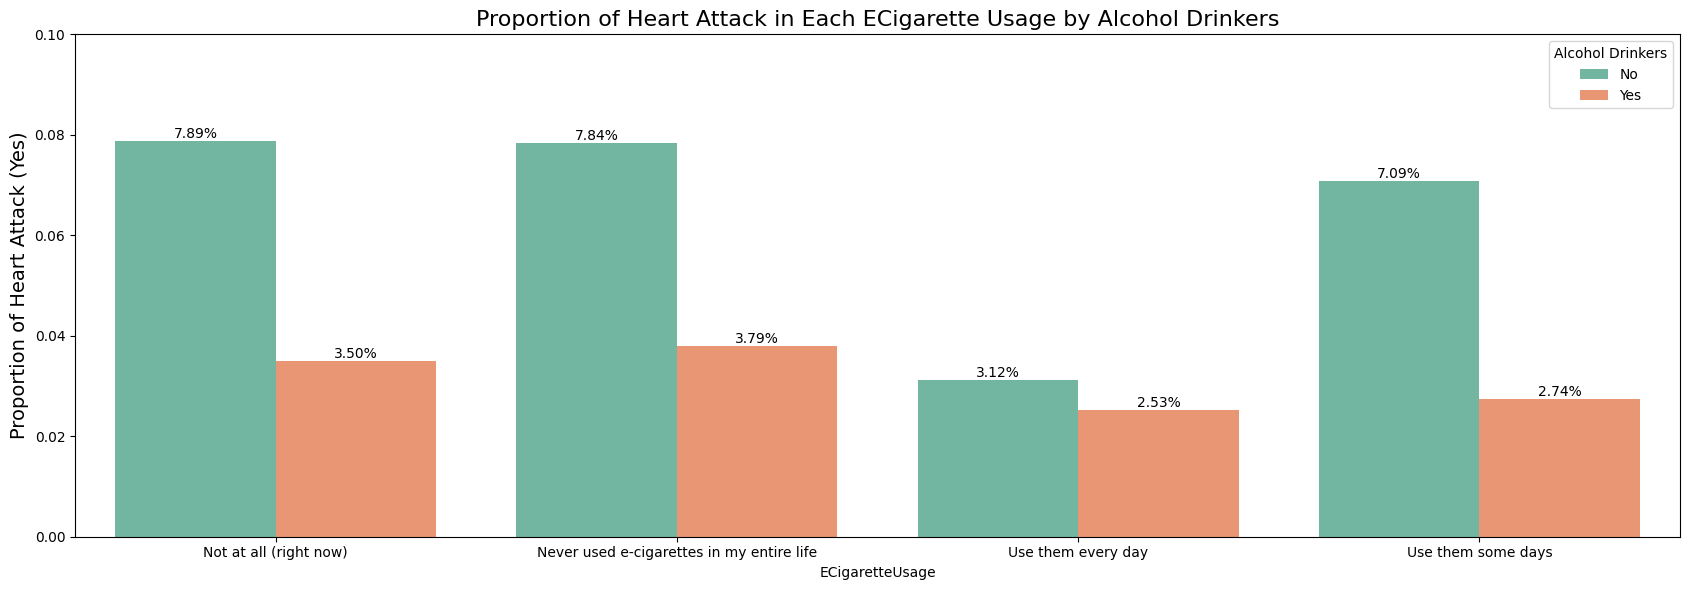

In [148]:
df['HeartAttackBinary'] = df['HadHeartAttack'].map({'Yes': 1, 'No': 0})

plt.figure(figsize=(17, 6))
ax = sns.barplot(
    data=df,
    x='ECigaretteUsage',
    y='HeartAttackBinary',
    hue='AlcoholDrinkers',
    estimator=np.mean, 
    palette='Set2',
    errorbar=None
)

plt.title('Proportion of Heart Attack in Each ECigarette Usage by Alcohol Drinkers', fontsize=16)
plt.ylabel('Proportion of Heart Attack (Yes)', fontsize=14)
plt.xticks()
plt.ylim(0, 0.1) 
plt.legend(title='Alcohol Drinkers')


for container in ax.containers:
    ax.bar_label(container, labels=[f'{v.get_height()*100:.2f}%' for v in container], label_type='edge', fontsize=10)

plt.tight_layout()
plt.show()

### Outliers

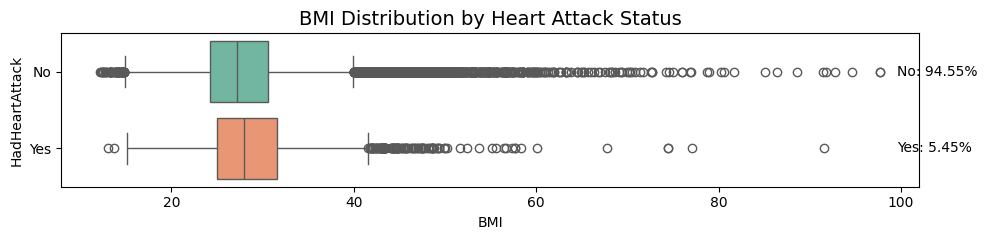

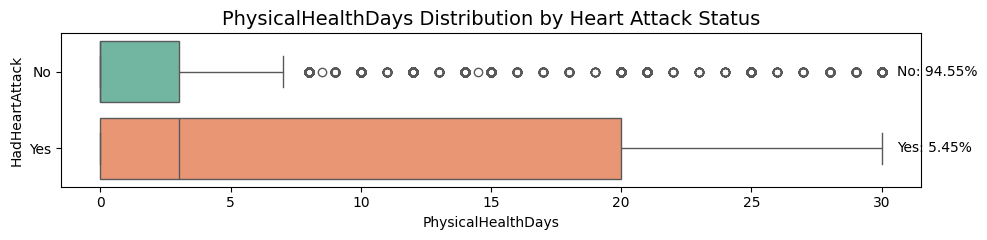

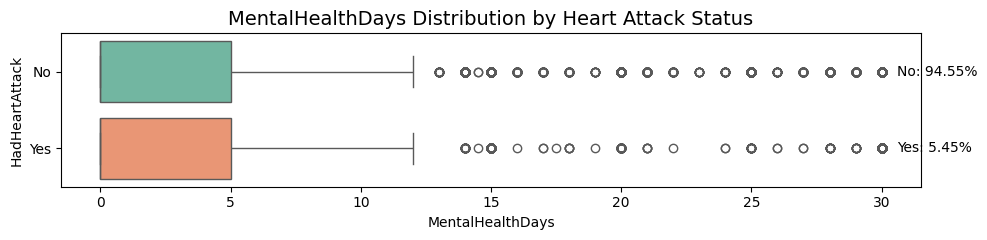

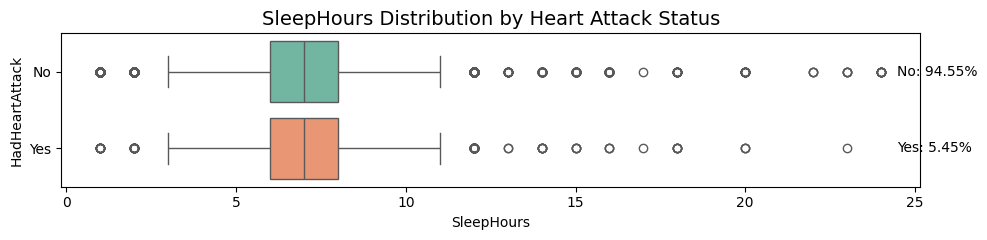

In [149]:
# Features to plot
features = ['BMI', 'PhysicalHealthDays', 'MentalHealthDays', 'SleepHours']

# Loop through each feature to generate the boxplots
for feature in features:
    plt.figure(figsize=(10, 2.5), dpi=100)
    
    # Create the boxplot
    ax = sns.boxplot(
        data=df,
        x=feature,
        y='HadHeartAttack',
        orient='h',
        hue='HadHeartAttack',  # Add hue to avoid the warning
        palette='Set2',
        legend=False  # Disable the legend
    )
    
    # Title for the plot
    plt.title(f'{feature} Distribution by Heart Attack Status', fontsize=14)
    
    # Calculate proportions for each 'HadHeartAttack' category
    counts = df['HadHeartAttack'].value_counts()
    total = counts.sum()
    
    # Prepare the labels with percentages
    labels = []
    for category in df['HadHeartAttack'].unique():
        if pd.isna(category):
            continue
        ratio = counts[category] / total * 100
        labels.append(f"{category}: {ratio:.2f}%")
    
    # Adding labels with proportions to the plot
    for i, label in enumerate(labels):
        ax.text(
            df[feature].max() * 1.02,  # Position of the label (adjusted to the max value of the feature)
            i,  # Position of the label in the 'HadHeartAttack' categories
            label,
            verticalalignment='center',
            fontsize=10,
            color='black'
        )
    
    # Ensure the layout fits and displays the plot
    plt.tight_layout()
    plt.show()


> Add methods to deal with outliers

#### For global outliers

In [150]:
import sys
import os

sys.path.append(os.path.abspath("../src"))

from data_preprocessing.outlier_transformation import transform_outliers, plot_transformed, check_normality, qq_plot


##### Log Transformation

In [151]:
df_transformed = transform_outliers(df, 'BMI', method='log')

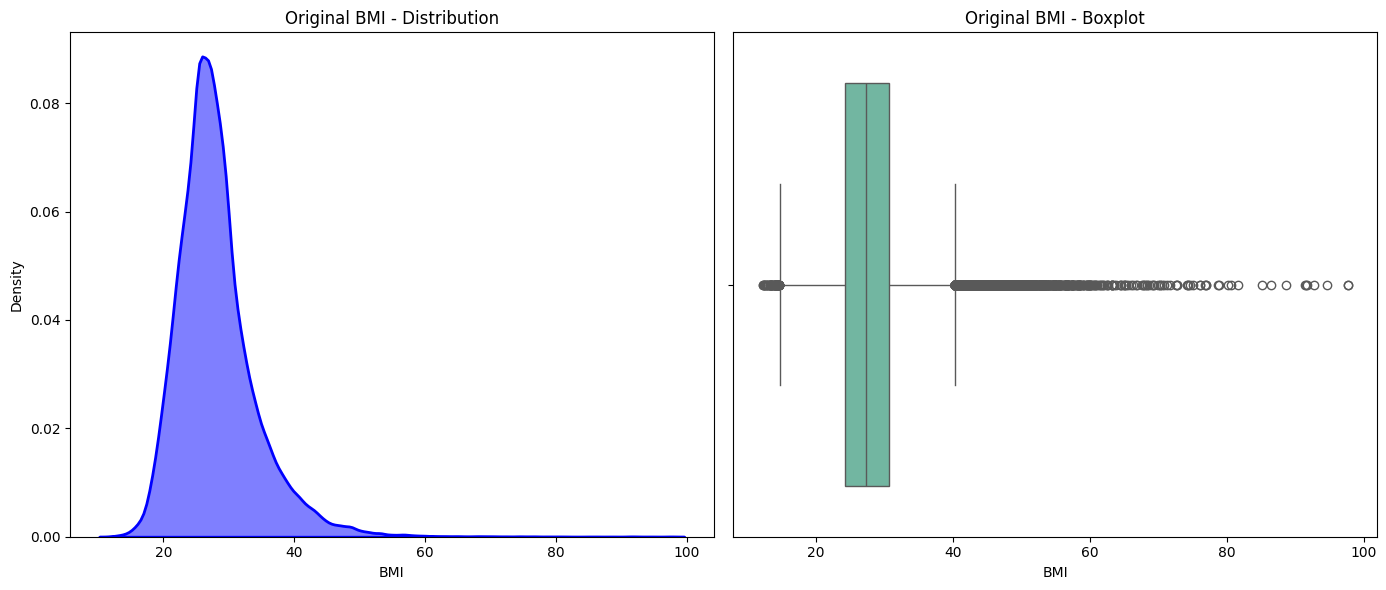

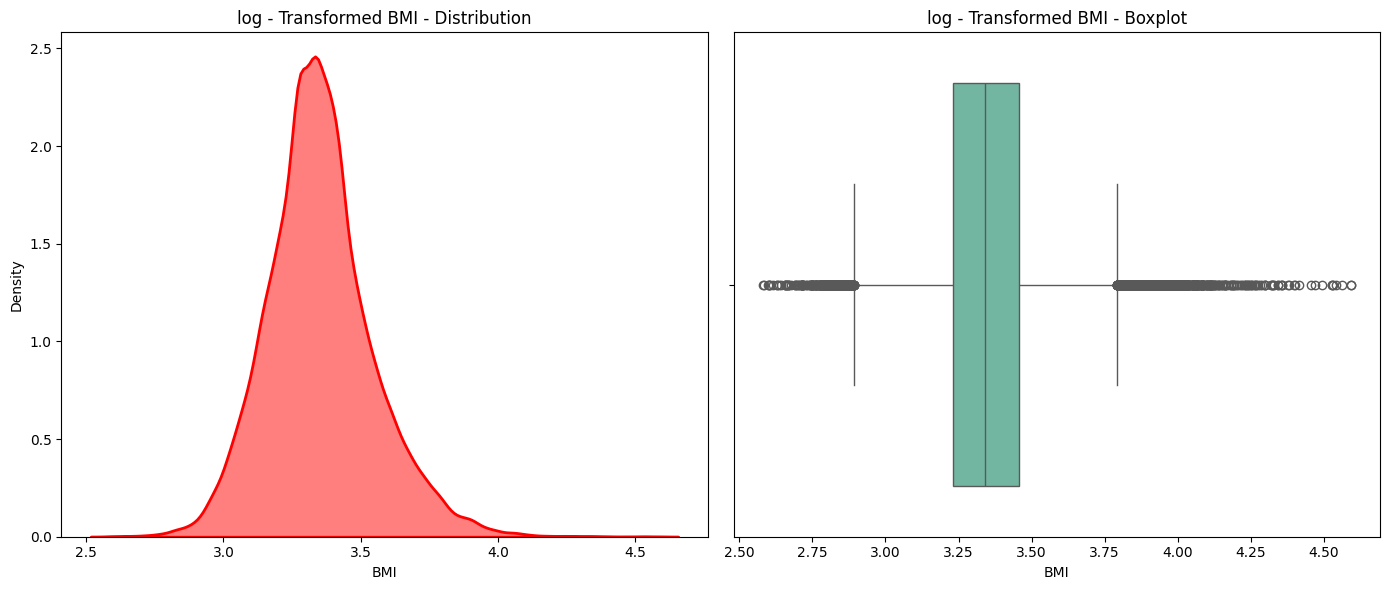

In [152]:
plot_transformed(df, 'BMI', df_transformed, 'BMI', method='log')

In [153]:
# Check normality after transformation
check_normality(df_transformed, 'BMI', method='log')

Shapiro-Wilk Test (log): Statistic = 0.9837265252735373, p-value = 1.1193372481906961e-59
log transformation: The data is likely not normally distributed.


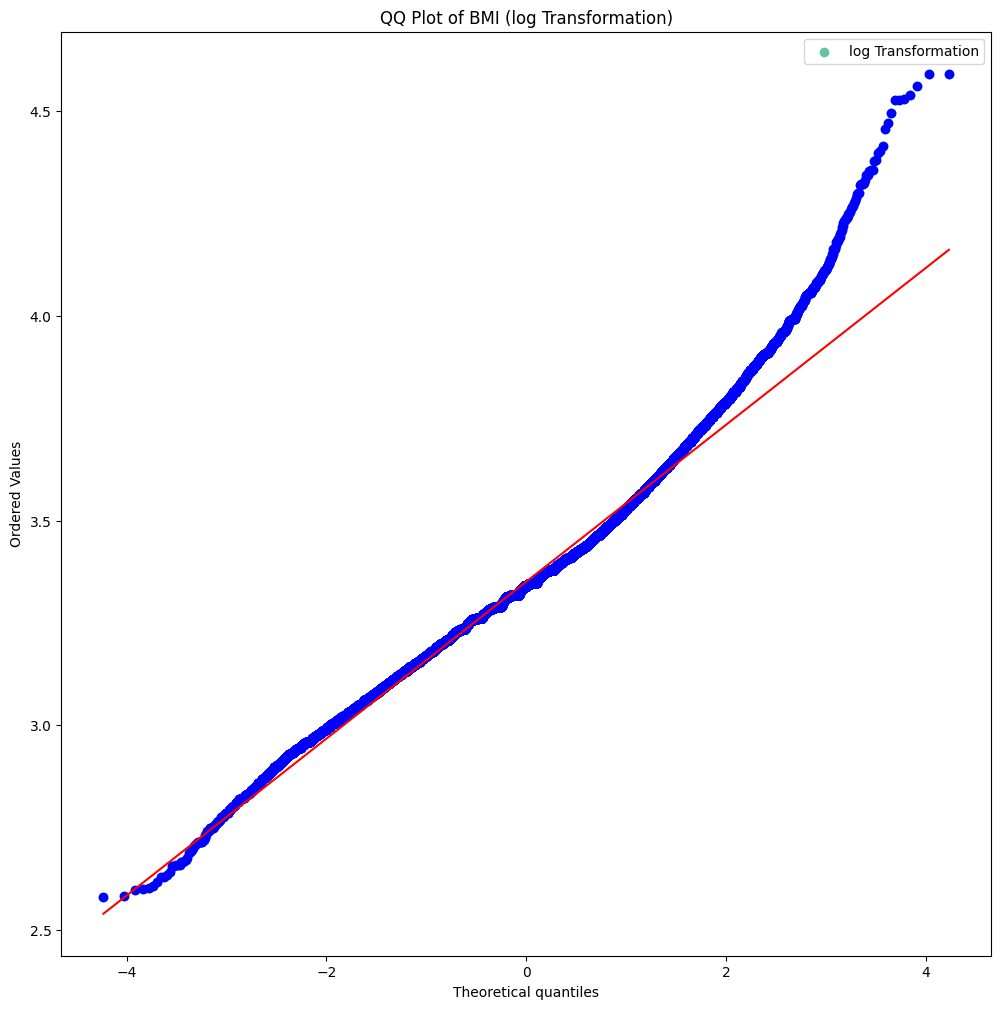

In [154]:
# QQ Plot to check normality visually
qq_plot(df_transformed, 'BMI', method='log')

> Try z_score, IQR, boxcox ...

##### local anomalies(outliers)
> Try  Local Outlier Factor (LOF) or Isolation Forest for detecting local anomalies

### Output new final data

In [156]:
output_path = '../data/cleaned/heart_2022_cleaned_01.csv'
if not os.path.exists(output_path):
    df.to_csv(output_path, index=False)
else:
    print(f"File {output_path} already exists.")

File ../data/cleaned/heart_2022_cleaned_01.csv already exists.
